# Лабораторная работа №3: Частотный анализ

Выполнил: Колованов Родион Алексеевич, группа 9381.

## Цель

Ознакомиться с методами частотного анализа из библиотеки *MLxtend*.

## Ход работы

Для начала были подключены необходимые библиотеки:

In [157]:
import numpy as np
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

import matplotlib.pyplot as plt

### Загрузка данных

Далее датасет `dataset_group.csv` был загружен в датафрейм, из которого был исключен столбец с датой покупки (столбец с индексом `0`). Остальные стоблцы были переименованы в подходящие для них названия.

In [158]:
df = pd.read_csv("dataset_group.csv", header=None)
df = df.drop(columns=[0])

df.rename(columns={1: "customer_id", 2: "product"}, inplace=True)

Полученный датафрейм:

In [159]:
display(df)

,customer_id,product
0,1,yogurt
1,1,pork
2,1,sandwich bags
3,1,lunch meat
4,1,all- purpose
...,...,...
22338,1139,soda
22339,1139,laundry detergent
22340,1139,vegetables
22341,1139,shampoo


Далее был получен список `id` всех покупателей, присутствующих в датафрейме:

In [161]:
customer_ids = list(set(df["customer_id"]))

print("Количество покупателей:", len(customer_ids))

Количество покупателей: 1139


Далее был получен список всех товаров, присутствующих в датафрейме:

In [162]:
products = list(set(df["product"]))

print("Количество товаров:", len(products))

Количество товаров: 38


Далее был сформирован датасет, подходящий для частотного анализа. Для этого все товары одного покупателя были соединены в один список, id покупателя при этом отброшен, поскольку он больше не понадобится:

In [186]:
data = [[product for product in 
         df[df["customer_id"] == customer_id]["product"]] 
        for customer_id in customer_ids]

### Подготовка данных

Поскольку полученные данные не пригодны для анализа напрямую (каждый список товаров пользователя может содержать разное количество товаров), их необходимо закодировать так, чтобы их можно было представить в виде матрицы. Для кодированния
данных был использован `TransactionEncoder`:

In [166]:
te = TransactionEncoder()
te_data = te.fit_transform(data)
dataset = pd.DataFrame(te_data, columns=te.columns_)

Полученный датафрейм:

In [167]:
display(dataset)

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


Теперь данные пригодны для анализа. Данные представлены в виде таблицы, где строки соответствуют покупателям, а столбцы - продуктам. Если покупатель приобрел продукт, то на пересечении соответствующей строки и столбца значение ячейки равно `True`, иначе - `False`.

### Ассоциативный анализ с использованием алгоритма Apriori

Далее был применен алгоритм `Apriori` с минимальным уровнем поддержки `0.3`:

In [168]:
results = apriori(dataset, min_support=0.3, use_colnames=True)
results["length"] = results["itemsets"].apply(lambda x: len(x))

Полученные результаты:

In [169]:
display(results)

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


Как видно из результатов, из данных можно выделить 51 набор продуктов, уровень поддержки которых выше `0.3`. Столбец `support` содержит значение относительной поддержки набора, `itemsets` - продукты, входящие в набор, `length` - количество продуктов в наборе (размер набора). Значение относительной поддержки можно интерпретировать как вероятность появления набора в транзакции.

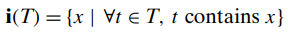



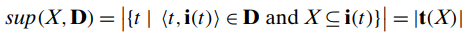

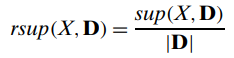

Далее алгоритм `Apriori` был повторно применен с тем же уровнем поддержки, но с ограничением максимального размера набора (только наборы размера `1`):

In [170]:
results = apriori(dataset, min_support=0.3, use_colnames=True, max_len=1)

display(results)

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


Как видно из результатов, из данных можно выделить 37 наборов продуктов, состоящих из одного продукта, уровень поддержки которых выше `0.3`. Количество наборов совпадает с количеством наборов, состоящих из одного продукта, полученном на предыдущем выполнении алгоритма.

Далее алгоритм `Apriori` был повторно применен с тем же уровнем поддержки, но с ограничением максимального размера набора (только наборы размера `2`):

In [171]:
results = apriori(dataset, min_support=0.3, use_colnames=True, max_len=2)
results["length"] = results["itemsets"].apply(lambda x: len(x))
results = results[results["length"] == 2]

display(results)
print("Количество наборов:", len(results))

,support,itemsets,length
38,0.310799,"(vegetables, aluminum foil)",2
39,0.300263,"(bagels, vegetables)",2
40,0.310799,"(cereals, vegetables)",2
41,0.309043,"(cheeses, vegetables)",2
42,0.308165,"(dinner rolls, vegetables)",2
43,0.306409,"(dishwashing liquid/detergent, vegetables)",2
44,0.326602,"(eggs, vegetables)",2
45,0.302897,"(ice cream, vegetables)",2
46,0.309043,"(laundry detergent, vegetables)",2
47,0.311677,"(lunch meat, vegetables)",2


Количество наборов: 14


Как видно из результатов, из данных можно выделить 14 наборов продуктов, состоящих из двух продуктов, уровень поддержки которых выше `0.3`. Количество наборов совпадает с количеством наборов, состоящих из двух продуктов, полученном на первом выполнении алгоритма.

Далее было подсчитано количество наборов при различных уровнях поддержки и на основании результатов построен график зависимости количества наборов от уровня поддержки. Также определены значения уровней поддержки, при которых перестают генерироваться наборы размера `1`, `2`, `3`, и `4`. В качестве начального значения поддержки было взято значение `0.05`, в качестве шага - `0.01`.

При значении поддержки 0.74 и более наборы размера 1 перестают генерироваться.
При значении поддержки 0.34 и более наборы размера 2 перестают генерироваться.
При значении поддержки 0.17 и более наборы размера 3 перестают генерироваться.
При значении поддержки 0.09 и более наборы размера 4 перестают генерироваться.


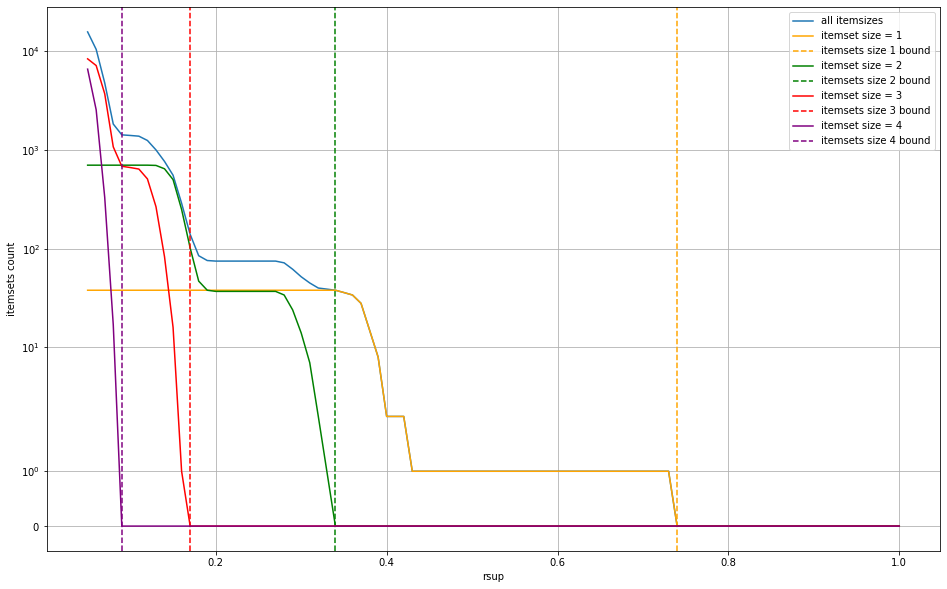

In [172]:
support_values = np.linspace(0.05, 1, 96)
itemset_lengths = [1, 2, 3, 4]
itemset_count = [[] for _ in itemset_lengths]
total_itemset_count = []


for support_value in support_values:
    results = apriori(dataset, min_support=support_value)
    results["length"] = results["itemsets"].apply(lambda x: len(x))
    
    total_itemset_count.append(len(results))
    
    for i in range(len(itemset_lengths)):
        itemset_count[i].append(len(results[results["length"] == itemset_lengths[i]]))


plt.figure(figsize=(16, 10))
plt.yscale("symlog")
plt.xlabel("rsup")
plt.ylabel("itemsets count")

plt.plot(support_values, total_itemset_count, label=f"all itemsizes")

colors = ["orange", "green", "red", "purple"]
for i in range(len(itemset_lengths)):
    bound_support_value = support_values[itemset_count[i].index(0)]
    plt.plot(support_values, itemset_count[i], label=f"itemset size = {itemset_lengths[i]}", c=colors[i])
    plt.axvline(bound_support_value, linestyle="dashed", label=f"itemsets size {itemset_lengths[i]} bound",
                c=colors[i])
    print(f"При значении поддержки {round(bound_support_value, 3)} и более "
          f"наборы размера {itemset_lengths[i]} перестают генерироваться.")

plt.grid()
plt.legend()
plt.show()

Как видно из результатов, графики наборов с меньшим размером всегда располагаются выше, чем графики наборов с большим размером. Также наборы с большим размером перестают генерироваться раньше, чем наборы с меньшим размером. Генерация наборов размера `4` оканчивается при уровне поддержки `0.09`, наборов размера `3` - `0.17`, наборов размера `2` - `0.34`, наборов размера `1` - `0.74`.

Далее был собран датасет только из тех элементов, в которые попадают наборы размером `1` при уровне поддержки `0.38`:

In [187]:
results = apriori(dataset, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(itemset)[0] for itemset in results["itemsets"]]
new_data = [[product for product in 
             df[df["customer_id"] == customer_id]["product"] if product in new_items] 
            for customer_id in customer_ids]

new_te_data = te.fit_transform(new_data)
new_dataset = pd.DataFrame(new_te_data, columns=te.columns_)

display(new_dataset)

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


Далее был проведен ассоциативный анализ при уровне поддержки `0.3` для нового датасета:

In [174]:
results = apriori(dataset, min_support=0.3, use_colnames=True)
new_results = apriori(new_dataset, min_support=0.3, use_colnames=True)

display(results)
display(new_results)

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


Наборы с рассчитаными уровнями поддержки из нового датасет входят в наборы с рассчитаными уровнями поддержки из старого датасета, при этом значения относительной поддержки также совпадают. Единственное отличие - некоторые наборы из наборов старого датасета отсутствуют в новом датасете. Это объясняется тем, что в новом датасете мы исключили часть продуктов, соответсвенно набором с исключенными продуктами быть не может. Итого было получено 27 наборов.

Далее был проведен ассоциативный анализ при уровне поддержки `0.15` для нового датасета:

In [175]:
new_results = apriori(new_dataset, min_support=0.15, use_colnames=True)

display(new_results)

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
...,...,...
127,0.158033,"(eggs, soda, vegetables)"
128,0.157155,"(yogurt, eggs, vegetables)"
129,0.158033,"(vegetables, lunch meat, poultry)"
130,0.157155,"(waffles, lunch meat, vegetables)"


Все наборы размером больше 1, в которых есть продукт `yogurt` или `waffles`:

In [188]:
itemsets = [tuple(itemset) for itemset in new_results["itemsets"]
            if ("yogurt" in itemset or "waffles" in itemset) and len(itemset) > 1]

print("Количество наборов:", len(itemsets))
display(itemsets)

Количество наборов: 30


[('waffles', 'aluminum foil'),
 ('yogurt', 'aluminum foil'),
 ('waffles', 'bagels'),
 ('bagels', 'yogurt'),
 ('waffles', 'cereals'),
 ('cereals', 'yogurt'),
 ('waffles', 'cheeses'),
 ('cheeses', 'yogurt'),
 ('dinner rolls', 'waffles'),
 ('dinner rolls', 'yogurt'),
 ('waffles', 'dishwashing liquid/detergent'),
 ('dishwashing liquid/detergent', 'yogurt'),
 ('waffles', 'eggs'),
 ('eggs', 'yogurt'),
 ('waffles', 'ice cream'),
 ('ice cream', 'yogurt'),
 ('waffles', 'lunch meat'),
 ('lunch meat', 'yogurt'),
 ('milk', 'yogurt'),
 ('waffles', 'poultry'),
 ('yogurt', 'poultry'),
 ('waffles', 'soda'),
 ('soda', 'yogurt'),
 ('waffles', 'vegetables'),
 ('yogurt', 'vegetables'),
 ('waffles', 'yogurt'),
 ('yogurt', 'vegetables', 'aluminum foil'),
 ('yogurt', 'eggs', 'vegetables'),
 ('waffles', 'lunch meat', 'vegetables'),
 ('yogurt', 'vegetables', 'poultry')]

Далее был построен датасет, состоящий из тех элементов, которые не попали предыдущий датасет:

In [177]:
remove_columns = list(new_dataset.columns)
new_dataset2 = dataset.drop(remove_columns, axis=1)

display(new_dataset2)

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


Далее был проведен ассоциативный анализ при уровне поддержки `0.3` для нового датасета:

In [178]:
new_results2 = apriori(new_dataset2, min_support=0.3, use_colnames=True)

display(new_results2)

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


Наборы с рассчитаными уровнями поддержки из нового датасет входят в наборы с рассчитаными уровнями поддержки из исходного датасета, при этом значения относительной поддержки также совпадают. Единственное отличие - некоторые наборы из наборов исходного датасета отсутствуют в новом датасете. Это объясняется тем, что в новом датасете мы исключили часть продуктов, соответсвенно набором с исключенными продуктами быть не может. Пересечение наборов нового датасета с наборами предыдущего датасета отсутствует, поскольку множества продуктов не пересекаются между собой. Итого было получено 22 набора.

Далее было составлено правило для вывода всех наборов, в которых хотя бы два элемента начинаются на `s`:

In [179]:
results = apriori(dataset, min_support=0.15, use_colnames=True)
new_results3 = results[results.apply(lambda row: len([item for item in row["itemsets"] if item[0] == 's']) > 1, axis=1)]

display(results)
display(new_results3)

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
551,0.158033,"(vegetables, lunch meat, poultry)"
552,0.157155,"(waffles, lunch meat, vegetables)"
553,0.156277,"(vegetables, mixes, poultry)"
554,0.151888,"(sugar, vegetables, poultry)"


,support,itemsets
492,0.158911,"(sandwich bags, soap)"
493,0.162423,"(sandwich bags, soda)"
498,0.150132,"(shampoo, sandwich loaves)"
499,0.158033,"(sandwich loaves, soap)"
500,0.150132,"(sandwich loaves, spaghetti sauce)"
503,0.151010,"(shampoo, soap)"
504,0.150132,"(shampoo, soda)"
509,0.174715,"(soda, soap)"
510,0.160667,"(spaghetti sauce, soap)"
511,0.154522,"(sugar, soap)"


Далее было составлено правило для вывода всех наборов, уровень поддержки которых изменяется от `0.1` до `0.25`:

In [185]:
results = apriori(dataset, min_support=0.15, use_colnames=True)
new_results4 = results[[support >= 0.1 and support <= 0.25 for support in results["support"]]]

display(results)
display(new_results4)

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
551,0.158033,"(vegetables, lunch meat, poultry)"
552,0.157155,"(waffles, lunch meat, vegetables)"
553,0.156277,"(vegetables, mixes, poultry)"
554,0.151888,"(sugar, vegetables, poultry)"


,support,itemsets
38,0.157155,"(all- purpose, aluminum foil)"
39,0.150132,"(bagels, all- purpose)"
40,0.151010,"(all- purpose, cereals)"
41,0.155399,"(dinner rolls, all- purpose)"
42,0.160667,"(all- purpose, dishwashing liquid/detergent)"
...,...,...
551,0.158033,"(vegetables, lunch meat, poultry)"
552,0.157155,"(waffles, lunch meat, vegetables)"
553,0.156277,"(vegetables, mixes, poultry)"
554,0.151888,"(sugar, vegetables, poultry)"


## Вывод

В ходе выполнения лабораторной работы был рассмотрен алгоритм `Apriori` для частотного анализа из библиотеки `Mlxtend`.

Были рассмотрены:
* Подготовка данных для частотного анализа;
* Работа алгоритма `Apriori` при различных значениях уровня поддержки;
* Отбор необходимых наборов данных из всего набора.